In [2]:
import sys
sys.path.append('../')
from graph_max_shift import *
import matplotlib.pyplot as plt
from scipy.optimize import root
import pickle

In [3]:
n = 10000

In [4]:
# use for plotting
from matplotlib.colors import ListedColormap
colors = ["tab:gray",  "#ED5564", "#4FC1E8", "#FFCE54", "#A0D568", "#AC92EB"]
cmap = ListedColormap(colors)

plt.rc('font',  size = 14)

# Bimodal example 

In [5]:
# get ground truth clustering
weights = [1/2, 1/2]
means = [np.array([1,-1]), np.array([-1,1])]
covs = [np.array([[(2/3)**2,(7/10)*(2/3)**2], [(7/10)*(2/3)**2, (2/3)**2]]), np.array([[(2/3)**2,0], [0, (2/3)**2]])]

bimodal = GaussianMixture(weights, means, covs)
modes, saddle, boundaries = ground_truth_clustering(bimodal)

In [6]:
modes = find_modes(bimodal)
saddle = find_saddle_points(bimodal)
boundaries = get_boundaries(bimodal, saddle, perturbation = .01, num_steps = 5000, step_size = 1, scale_factor = 10e4)

In [7]:
# generate data and cluster
# data = bimodal.sample(n)
with open('data/bimodal.pkl', 'rb') as file:
    data,_,_,_ = pickle.load(file)
graph = GeometricGraph(data, .5, batch_size=10000)
maxshift = GraphMaxShift(graph)

r = .23
maxshift.cluster(r, m = 1)
clusters = maxshift.reindex_clusters(25) #useful for visualization purposes

100%|██████████| 10000/10000 [00:01<00:00, 7514.73it/s]
C:\Users\codae\Documents\GraphMaxShift\figures\..\graph_max_shift\main.py:179: RuntimeWarning: Couldn't reach some vertices at src/paths/unweighted.c:444
  graph_distance = len(self.graph.G.get_shortest_path(i,j)) -1


(-4.0, 4.0)

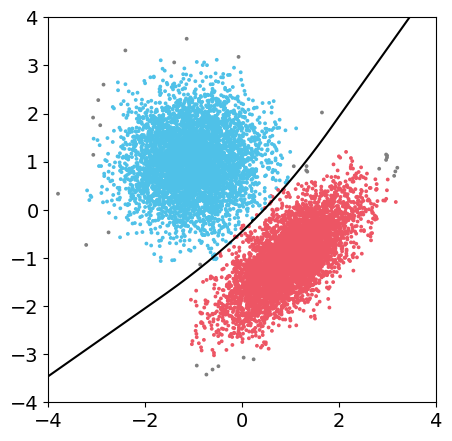

In [8]:
plt.figure(figsize = [5,5])
plt.scatter(data[:,0], data[:,1], c = clusters, cmap = cmap, s = 3, vmin =0, vmax = 6)
for path in boundaries :
    plt.plot(path[:,0], path[:,1], color = 'black')
plt.xlim(-4,4)
plt.ylim(-4,4)

In [13]:
# params = {'h': r, 'r':r}
# with open('data/bimodal.pkl', 'wb') as file: # save raw data, clusters, parameters used, and ground truth 
#     pickle.dump((data, clusters, params, boundaries), file)

# Trimodal example

In [11]:
weights = [3/7, 3/7,1/7]
means = [np.array([-1,0]), np.array([1, 2*np.sqrt(3)/3]), np.array([1, -2*np.sqrt(3)/3])]
covs = [get_covariance_matrix((3/5)**2,(7/10)**2,3/5), get_covariance_matrix((3/5)**2,(7/10)**2,0), get_covariance_matrix((3/5)**2,(7/10)**2,0)]


trimodal = GaussianMixture(weights, means, covs)
modes, saddle, boundaries = ground_truth_clustering(trimodal)

In [12]:
# remove redudant boundaries 
boundaries = boundaries[0:2] + boundaries[4:6]

In [13]:
# generate data and cluster
# data = trimodal.sample(n)

with open('data/trimodal.pkl', 'rb') as file:
    data,_,_,_ = pickle.load(file)

graph = GeometricGraph(data, .5, batch_size=10000)
maxshift = GraphMaxShift(graph)

r = .34
maxshift.cluster(r, m =1)
clusters = maxshift.reindex_clusters(25) 

100%|██████████| 10000/10000 [00:01<00:00, 8985.54it/s]


(-4.0, 4.0)

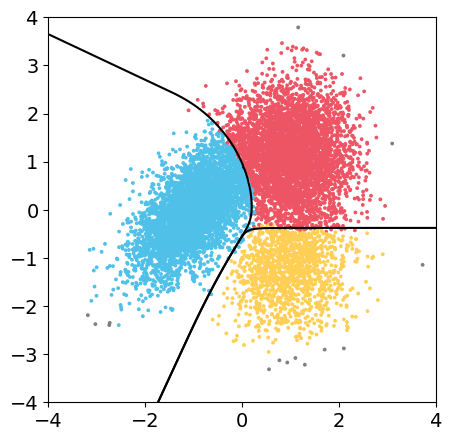

In [14]:
plt.figure(figsize = [5,5])
plt.scatter(data[:,0], data[:,1], c = clusters, cmap = cmap, s = 3, vmin =0, vmax = 6)
for path in boundaries :
    plt.plot(path[:,0], path[:,1], color = 'black')
plt.xlim(-4,4)
plt.ylim(-4,4)

In [271]:
# params = {'h': r, 'r':r}
# with open('data/trimodal.pkl', 'wb') as file: # save raw data, clusters, parameters used, and ground truth 
#     pickle.dump((data, clusters, params, boundaries), file)

# Quadrimodal example

In [15]:
means = [np.array([-1,1]),np.array([-1,-1]),
         np.array([1,-1]),np.array([1,1]),]
weights = [1/8, 3/8, 1/8, 3/8]
covs = [get_covariance_matrix((2/3)**2, (2/3)**2,2/5 ),
          get_covariance_matrix((2/3)**2, (2/3)**2,3/5 ),
          get_covariance_matrix((2/3)**2, (2/3)**2,-7/10 ),
          get_covariance_matrix((2/3)**2, (2/3)**2,-1/2 ),]

quadrimodal = GaussianMixture(weights, means, covs)

In [16]:
# # finding the clustering in this example requires some more tuning as there is also a minima to consider
modes = find_modes(quadrimodal) 
saddle = find_saddle_points(quadrimodal)

# correction to remove points very close together and an extra point
saddle.pop(1)
saddle.pop(-1)


boundaries = get_boundaries(quadrimodal, saddle, perturbation = .2) 

# clean up boundaries by removing extra segment, redundancies, and closing gap between some 
minima = root(quadrimodal.grad, np.array([-.25, .25]), jac = quadrimodal.hessian, method = 'lm' )
boundaries = boundaries
boundaries += [np.vstack((boundaries[0][0], boundaries[1][0]))]
boundaries += [np.vstack((boundaries[2][0], boundaries[3][0]))]
boundaries += [np.vstack((boundaries[4][0], boundaries[5][0]))]
boundaries += [np.vstack((boundaries[6][0], boundaries[7][0]))]
boundaries[1] = boundaries[1][0: np.argmin(np.linalg.norm(boundaries[1] - minima.x, axis =1 ))]
boundaries[3] = boundaries[3][0: np.argmin(np.linalg.norm(boundaries[3] - minima.x, axis =1 ))]
boundaries[6] = boundaries[6][0: np.argmin(np.linalg.norm(boundaries[6] - minima.x, axis =1 ))]


In [17]:
# generate data and cluster
# data = quadrimodal.sample(n)

with open('data/quadrimodal.pkl', 'rb') as file:
    data,_,_,_ = pickle.load(file)
graph = GeometricGraph(data, .5, batch_size=10000)
maxshift = GraphMaxShift(graph)

r = .35
maxshift.cluster(r, m =1)
clusters = maxshift.reindex_clusters(25) 

100%|██████████| 10000/10000 [00:01<00:00, 8862.68it/s]


(-4.0, 4.0)

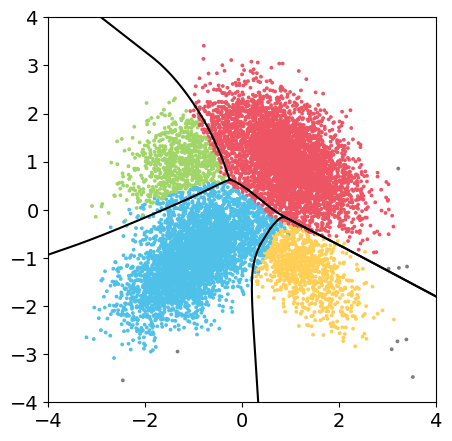

In [18]:
plt.figure(figsize = [5,5])
plt.scatter(data[:,0], data[:,1], c = clusters, cmap = cmap, s = 3, vmin =0, vmax = 6)
for path in boundaries :
    plt.plot(path[:,0], path[:,1], color = 'black')
plt.xlim(-4,4)
plt.ylim(-4,4)

In [298]:
# params = {'h': r, 'r':r}
# with open('data/quadrimodal.pkl', 'wb') as file: # save raw data, clusters, parameters used, and ground truth 
#     pickle.dump((data, clusters, params, boundaries), file)

# Fountain Example

In [21]:
means = [np.array([0,0]),np.array([0,0]),
         np.array([-1,-1]),np.array([-1,1]),
         np.array([1,-1]),np.array([1,1]),]
weights = [1/2] + [1/10 for i in range(5)]
covs= [np.eye(2)] + [1/16*np.eye(2) for i in range(5)]
fountain= GaussianMixture(weights, means, covs)

In [22]:
modes = find_modes(fountain) 
saddle = find_saddle_points(fountain)
saddle = saddle[5:9] #clean up

boundaries = get_boundaries(fountain, saddle, perturbation = .1) 

for i in np.arange(0,8,2): #fill in small gaps 
    boundaries += [np.vstack((boundaries[i][0], boundaries[i+1][0]))]

In [23]:
# data = fountain.sample(n)

with open('data/fountain.pkl', 'rb') as file:
    data,_,_,_ = pickle.load(file)
graph = GeometricGraph(data, .5, batch_size=10000)
maxshift = GraphMaxShift(graph)

r = .245
maxshift.cluster(r, m = 1)
clusters = maxshift.reindex_clusters(25) 

100%|██████████| 10000/10000 [00:00<00:00, 11354.10it/s]


(-4.0, 4.0)

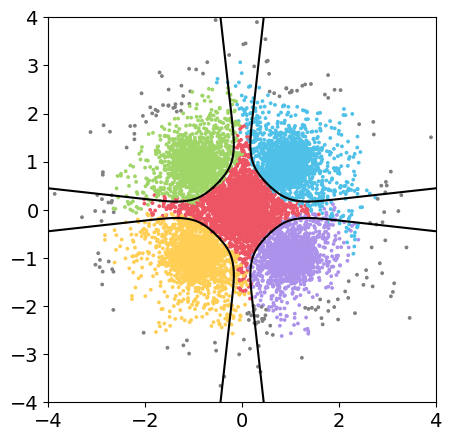

In [24]:
plt.figure(figsize = [5,5])
plt.scatter(data[:,0], data[:,1], c = clusters, cmap = cmap, s = 3, vmin =0, vmax = 6)
for path in boundaries :
    plt.plot(path[:,0], path[:,1], color = 'black')
plt.xlim(-4,4)
plt.ylim(-4,4)

In [243]:
# params = {'h': r, 'r':r}
# with open('data/fountain.pkl', 'wb') as file: # save raw data, clusters, parameters used, and ground truth 
#     pickle.dump((data, clusters, params, boundaries), file)

# Combine into one figure 

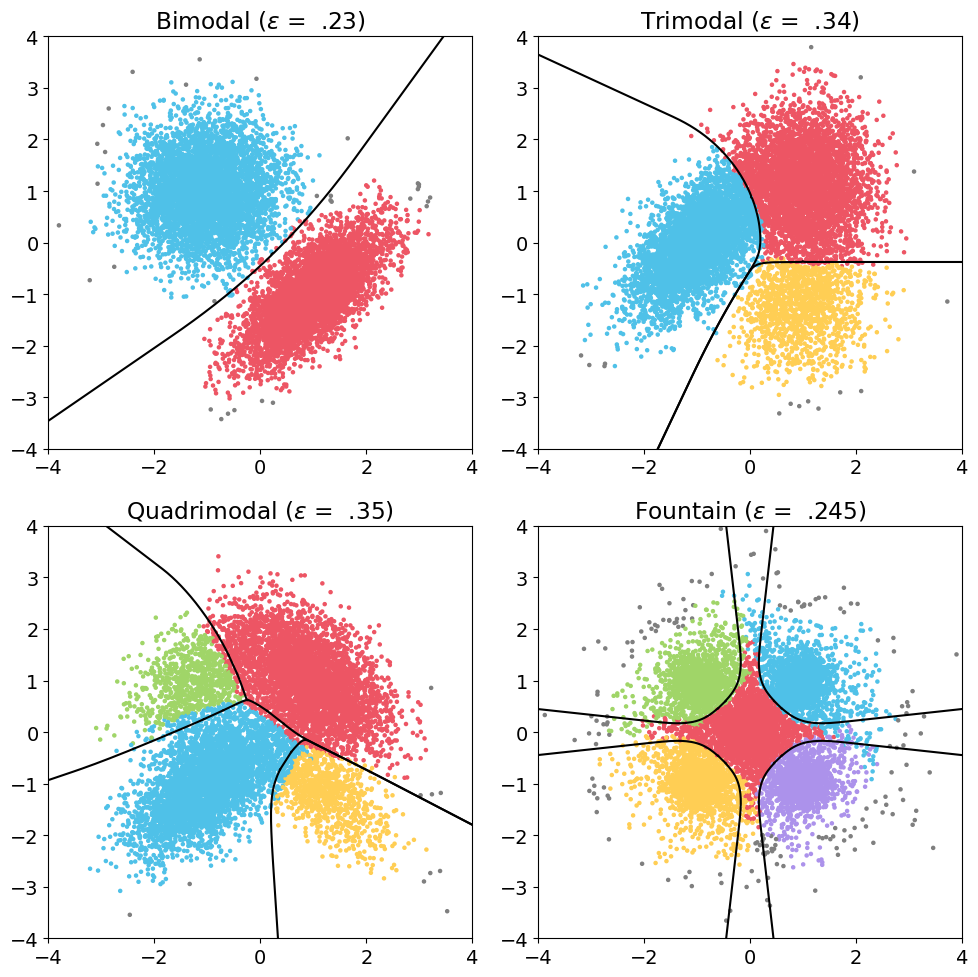

In [8]:
fig, axs = plt.subplots(2,2, figsize = [10,10])

with open('data/bimodal.pkl', 'rb') as file:
    data, clusters, _, boundaries=  pickle.load(file)
axs[0,0].scatter(data[:,0], data[:,1],  c = clusters, cmap = cmap, s = 5, vmin =0, vmax = 6)
for path in boundaries:
    axs[0,0].plot(path[:,0], path[:,1], color = 'black')
    
with open('data/trimodal.pkl', 'rb') as file:
    data, clusters, _, boundaries=  pickle.load(file)
axs[0,1].scatter(data[:,0], data[:,1],  c = clusters, cmap = cmap, s = 5, vmin =0, vmax = 6)
for path in boundaries:
    axs[0,1].plot(path[:,0], path[:,1], color = 'black')
    
with open('data/quadrimodal.pkl', 'rb') as file:
    data, clusters, _, boundaries=  pickle.load(file)
axs[1,0].scatter(data[:,0], data[:,1],  c = clusters, cmap = cmap, s = 5, vmin =0, vmax = 6)
for path in boundaries:
    axs[1,0].plot(path[:,0], path[:,1], color = 'black')
    
with open('data/fountain.pkl', 'rb') as file:
    data, clusters, _, boundaries=  pickle.load(file)
    axs[1,1].scatter(data[:,0], data[:,1],  c = clusters, cmap = cmap, s = 5, vmin =0, vmax = 6)
    for path in boundaries:
        axs[1,1].plot(path[:,0], path[:,1], color = 'black')

    
for i in range(2):
    for j in range(2):
        axs[i,j].set_xlim(-4,4)
        axs[i,j].set_ylim(-4,4)
        
axs[0,0].set_title(r'Bimodal ($\epsilon$ =  .23)')
axs[0,1].set_title(r'Trimodal ($\epsilon$ =  .34)')
axs[1,0].set_title(r'Quadrimodal ($\epsilon$ =  .35)')
axs[1,1].set_title(r'Fountain ($\epsilon$ =  .245)')
plt.tight_layout()
plt.savefig('plots/mixture.png', format='png', dpi=300, bbox_inches='tight')